# Fatal Police Shootings in the US #

## 1. Introduction

*** BERA SAMAN HVAÐ ÞAÐ BUA MARGIR EÐA ÞU VEIST, BERA SAMAN HVERSU MARGIR HVÍTIR ERU OG HVERSU MARGIR SVARTIR, til að geta gert minoritie kjaftæði

In the years 2015, 2016, and 2017 there were 2945 people involved in a fatal police shooting in the United states according to [The Washington Post](https://www.washingtonpost.com/graphics/national/police-shootings/).  
Where we have 995 people killed in 2015, 963 people killed in 2016, and 987 people killed in 2017. As we can see from those numbers there is little change from years in police fatal shootings.  
In this report we will dive deeper into this, and try to answer the question in which city it is best to live in to avoid fatal police shootings.

## 2. About

### 2.1 Data
The data used for measurement is recieved from kaggle [fatal police shootings in the us](https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us/version/1)  
This source includes data about police shootings in the United States but also has an additional information regarding various information about the incident. The dataset also contains information about the city the incident occurred in, such as median income, percentages of how many completed high school and race division  of the cities.

## 3. Preparing the data

### 3.2 Import the necessary libraries

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 3.3 Import the data sets

In [2]:
# Read the datasets
shootings_df = pd.read_csv('resources/PoliceKillingsUS.csv',encoding="windows-1252",parse_dates=[2])
medianIncome_df = pd.read_csv('resources/MedianHouseholdIncome2015.csv',encoding="windows-1252")
povertyLevel_df = pd.read_csv('resources/PercentagePeopleBelowPovertyLevel.csv',encoding="windows-1252")
completedHighschool_df = pd.read_csv('resources/PercentOver25CompletedHighSchool.csv',encoding="windows-1252")
raceByCity_df = pd.read_csv('resources/ShareRaceByCity.csv',encoding="windows-1252")

#shootings_df.head(10)

## 4. Fatal shootings without ** correlation **

### 4.1 Visulation of police shootings sorted by races 

To show the difference between the races that are killed in police shootings from the data set we have desided to plot a pie chart which shows the percentages of each race involved in fatal police shootings.

In [3]:
# We have no use for the id and name columns so we desided to remove them
shootings_df = shootings_df.drop(['id','name'], axis=1)
# show the first 10 rows in the data frame
shootings_df.head(10) 

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,2015-04-01,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,2015-05-01,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,2015-06-01,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,2015-06-01,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,2015-06-01,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [4]:
def raceLabelToRace(raceLabel):
    if(raceLabel == 'W'):
        return 'White'
    if(raceLabel == 'B'):
        return 'Black'
    if(raceLabel == 'N'):
        return 'Native American'
    if(raceLabel == 'A'):
        return 'Asian'
    if(raceLabel == 'H'):
        return 'Hispanic'
    else:
        return 'Other'

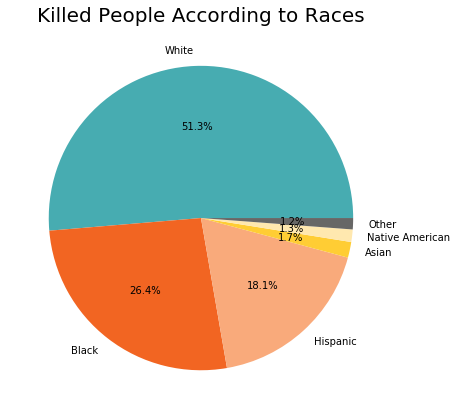

In [5]:
# Race rates  

shootings_df['race'].dropna(inplace = True)
labels = shootings_df['race'].value_counts().index
# Change the labels we have to words, for easier reading
labels = [raceLabelToRace(x) for x in labels]
colors = ['#47ACB1', '#F26522', '#F9AA7B', '#FFCD34','#FFE8AF','#676766']
values = shootings_df['race'].value_counts().values

# Plotting the pie chart
plt.figure(figsize = (7, 7))
plt.pie(values, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('Killed People According to Races', color = 'black', size = 20)
plt.show()

#### 4.1.1 Diving deeper into the race distribution

As you can see from the pie chart above, the largest percentages of races involved in police shootings had white skin. The results may be surprising, but it makes sense because 61% of people living in the United States in the year 2017 have white skin according to [KFF Population Distribution by Race/Ethnicity](https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)

## Reikna út eithvað fjör svipað og hér  ..... [héééééééér...](https://www.vox.com/identities/2016/8/13/17938186/police-shootings-killings-racism-racial-disparities)

## 4.2 Visulation of police shootings, weapons

#### 4.2.1 All Weapons

<BarContainer object of 10 artists>

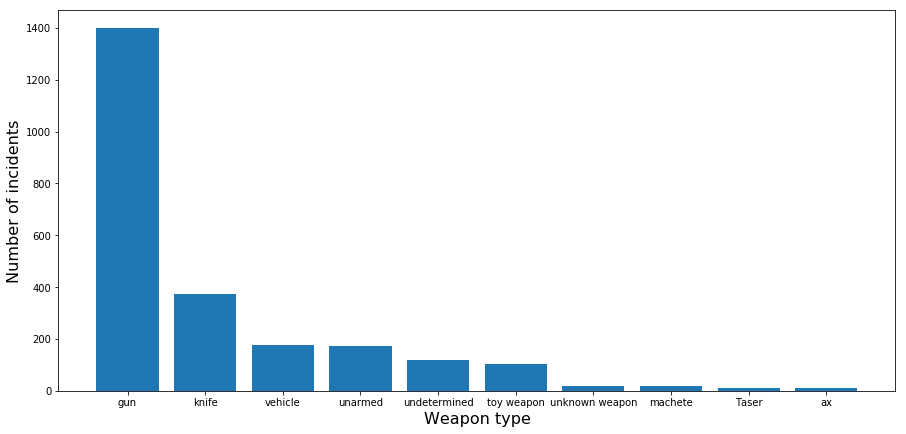

In [6]:
values = shootings_df['armed'].value_counts().values[:10]
labels = shootings_df['armed'].value_counts().index.tolist()[:10]

mpl_fig = plt.figure(figsize = (15, 7))
ax = mpl_fig.add_subplot(111)

ax.set_ylabel("Number of incidents", fontsize=16)
ax.set_xlabel("Weapon type", fontsize=16)

plt.bar(labels, values)

#### Weapons sorted by age gap

(18, 36]    1299
(36, 54]     791
(54, 72]     241
(0, 18]      105
(72, 90]      21
Name: age, dtype: int64
(2535, 12)


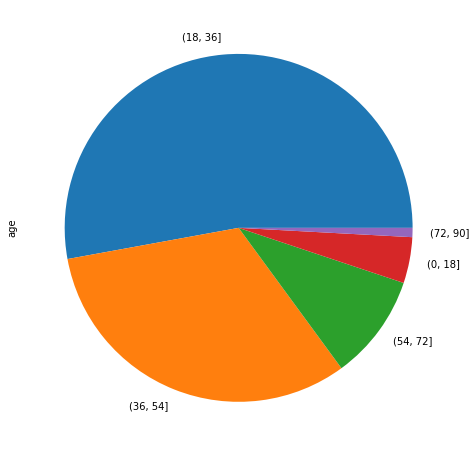

In [7]:
ranges = [i for i in range(0,100,18)]
#rangesLabels = [str(i) + '-' + str(i+10) for i in range(-25,35,10)]
r=range(1,19)
binCounter = pd.cut(shootings_df['age'],ranges).value_counts()
print(binCounter)

#values = shootings_df[shootings_df['age'] ==].value_counts().values[:10]
labels = shootings_df['armed'].value_counts().index.tolist()[:10]
print(shootings_df.shape)


binCounter.plot.pie(figsize=(8, 8))

In [8]:
shootings_df.head(10)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,2015-04-01,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,2015-05-01,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,2015-06-01,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,2015-06-01,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,2015-06-01,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


## 4.3 Visulation of police shootings sorted by age

Lets take a better look at the age distribution

      age
25.0  103
36.0   91
31.0   85
29.0   83
24.0   83
33.0   78
32.0   75
35.0   74
34.0   74
30.0   74


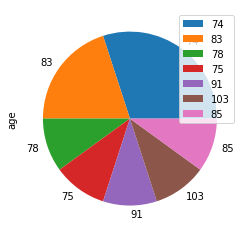

In [10]:
#### TODO ####


# Age rates
values = shootings_df['age'].value_counts()

# Get the 10 most
b = pd.DataFrame(values.head(10))
b.apply(pd.value_counts).plot.pie(subplots=True)
print(b)

4.3 Visulation of police shootings poverty level for each state

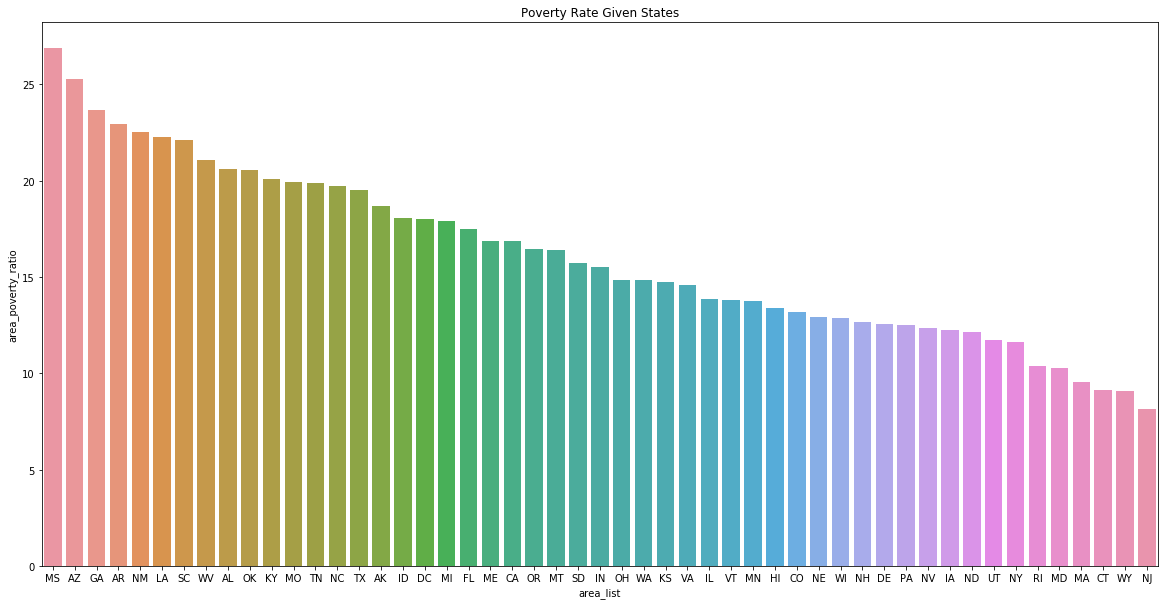

In [11]:
import seaborn as sns

#in order to change '-' to '0'
povertyLevel_df.poverty_rate.replace(['-'],0.0,inplace = True)
#Change the data to float
povertyLevel_df.poverty_rate = povertyLevel_df.poverty_rate.astype(float)
#list of geographic area
area_list = list(povertyLevel_df['Geographic Area'].unique())
area_poverty_ratio = []

for i in area_list:
    #a : geographical area in the i index of the data frame
    a = povertyLevel_df[povertyLevel_df['Geographic Area']==i] 
    area_poverty_rate = a.poverty_rate.mean()
    area_poverty_ratio.append(area_poverty_rate)

data = pd.DataFrame({'area_list' : area_list,'area_poverty_ratio' : area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending = False)).index.values
sorted_data = data.reindex(new_index)

#visualization
plt.figure(figsize = (20,10))
sns.barplot(x=sorted_data['area_list'],y=sorted_data['area_poverty_ratio'])
plt.xlabel = ('States')
plt.ylabel = ('Poverty Rate')
plt.title('Poverty Rate Given States')
plt.show()


## 4. Data cleaning

in the police-shootings file, we have attributes that are not relevant to us, when visualating the data:
* we have the name of the person killed,
* we also have some id

so we will start by removing those columns

In [9]:
weapon = shootings_df['armed'].value_counts()
print(weapon)

gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
toy weapon                           104
unknown weapon                        18
machete                               18
Taser                                  9
ax                                     9
sword                                  8
baseball bat                           8
hammer                                 7
box cutter                             7
metal pipe                             7
hatchet                                6
crossbow                               6
blunt object                           5
screwdriver                            5
gun and knife                          5
rock                                   3
metal stick                            3
scissors                               3
guns and explosives                    3
baton           

* Mental_ilness vs threat_level vs armed